In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA

In [43]:
# Load the files
filename1 = 'CorrMat1.csv'
filename2 = 'CorrMat3.csv'

df1 = pd.read_csv(filename1,header = None)
df2 = pd.read_csv(filename2,header = None)
print(df1.shape)
print(df2.shape)
df1_mat = df1.as_matrix

(100, 100)
(100, 100)


## Part A:
we plan on using PCA to reduce dimensionality to 1 and preserve most of the data but also clear out the outliers and then reconstruct the matrix.

<class 'method'>


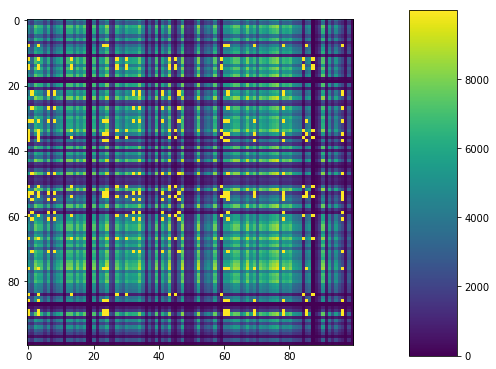

[0.73255454]


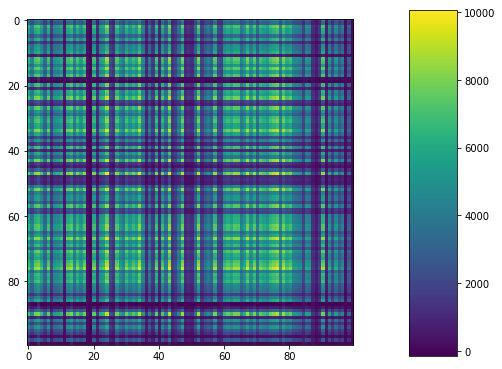

In [60]:
## plotting the original image
plt.figure(figsize=(9,6))
plt.imshow(df1);
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()

## does PCA analysis with 1 component aka reduces dimensionality to 1
pca = PCA(n_components = 1)
pca.fit(df1)

# to check variance preserved
print(pca.explained_variance_ratio_)


# Reducing the original matrix and then recovering by inverse transform
df1_reduced = pca.fit_transform(df1)
df1_recovered = pca.inverse_transform(df1_reduced)
plt.figure(figsize=(9,6))
plt.imshow(df1_recovered);
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()


Reducing dimensionality to 1 and projecting the data again as image removed most of the outlier points and gave us a better visual.

## part B
Repeating the same process as part one

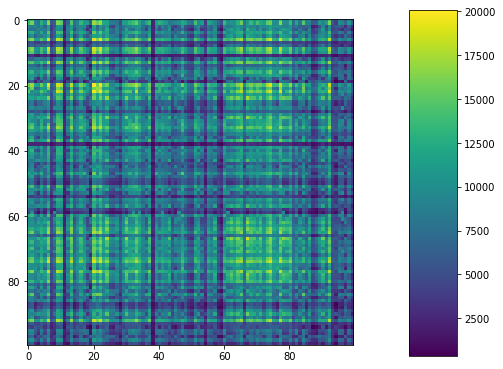

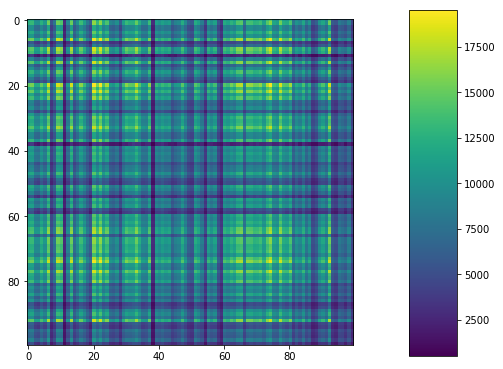

In [61]:

#plotting the original matrix
plt.figure(figsize=(9,6))
plt.imshow(df2);
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()

## fitting 2nd matrix with same pca model of dimensionality 1
pca.fit(df2)



# Reducing the original matrix and then recovering by inverse transform
df2_reduced = pca.fit_transform(df2)
df2_recovered = pca.inverse_transform(df2_reduced)
plt.figure(figsize=(9,6))
plt.imshow(df2_recovered)
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()

In [50]:
## this code can check for outliers and return indexes within specified std dev
#mean = test_col.mean()
#stdev = test_col.std()
#idx = []
#for index,value in test_col.iteritems():
#    if (value < (mean-1.4*stdev))or(value>(mean+1.4*stdev)):
#                idx.append(index)
###finding outlier index
#def find_outlier_index(column):
#    mean = column.mean(axis=0)
#    stdev = column.std(axis=0)
#    print(mean)
#    print(column.index)
#    print(row.index)
#df1.apply(find_outlier_index,axis =0)